In [28]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow.keras.models as models

In [29]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [30]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/ormec/DLearning/chess",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 1207 files belonging to 7 classes.


In [4]:
class_names = dataset.class_names
class_names

['Queen-Resized',
 'Rook-resize',
 'bishop_resized',
 'knight-resize',
 'pawn_resized']

In [5]:
len(dataset) # 38*32

38

In [6]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    

(32, 256, 256, 3)
[2 0 0 1 3 2 3 1 4 0 3 2 4 3 1 3 1 3 3 1 3 2 1 4 2 1 0 2 4 0 0 0]


In [7]:
for image_batch , label_batch in dataset.take(3):
    print(image_batch[0].numpy())

[[[235.    237.    236.   ]
  [235.    237.    236.   ]
  [235.    237.    236.   ]
  ...
  [235.    239.    238.   ]
  [235.    239.    238.   ]
  [235.    239.    238.   ]]

 [[235.    237.    236.   ]
  [235.    237.    236.   ]
  [235.    237.    236.   ]
  ...
  [235.    239.    238.   ]
  [235.    239.    238.   ]
  [235.    239.    238.   ]]

 [[235.625 237.625 236.625]
  [235.625 237.625 236.625]
  [235.625 237.625 236.625]
  ...
  [235.    239.    238.   ]
  [235.    239.    238.   ]
  [235.    239.    238.   ]]

 ...

 [[240.    242.    241.   ]
  [240.    242.    241.   ]
  [240.    242.    241.   ]
  ...
  [240.    242.    241.   ]
  [240.    242.    241.   ]
  [240.    242.    241.   ]]

 [[240.    242.    241.   ]
  [240.    242.    241.   ]
  [240.    242.    241.   ]
  ...
  [240.    242.    241.   ]
  [240.    242.    241.   ]
  [240.    242.    241.   ]]

 [[240.    242.    241.   ]
  [240.    242.    241.   ]
  [240.    242.    241.   ]
  ...
  [240.    242.    241. 

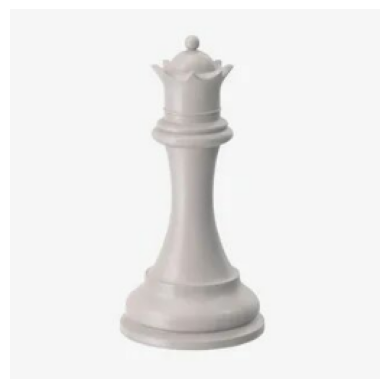

In [8]:
for image_batch , label_batch in dataset.take(3):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")

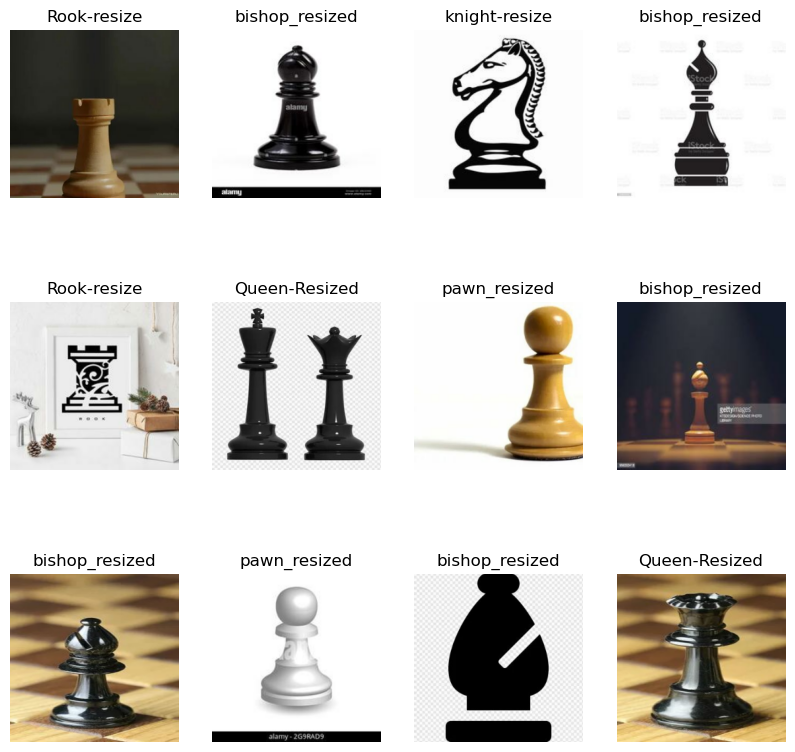

In [9]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [10]:
def get_dataset_partitions_tf(ds,train_split=0.8,test_split=0.1,val_split=0.1,
                              shuffle=True,shuffle_size=1000):
    ds_size = len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
        
    return train_ds,test_ds,val_ds

In [11]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [12]:
print("Train size = {} \nTest size = {} \nVal size = {} ".format(len(train_ds),len(test_ds),len(val_ds)))

Train size = 30 
Test size = 3 
Val size = 5 


In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [14]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [15]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [16]:
n_classes = 5
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D( 32 , (3,3) , activation='relu' , input_shape=(IMAGE_SIZE,IMAGE_SIZE)),
    layers.MaxPooling2D( (2,2) ),
    layers.Conv2D( 64 , kernel_size = (3,3) , activation='relu' ),
    layers.MaxPooling2D( (2,2) ),
    layers.Conv2D( 64 , kernel_size = (3,3) , activation='relu' ),
    layers.MaxPooling2D( (2,2) ),
    layers.Conv2D( 64 , (3,3) , activation='relu' ),
    layers.MaxPooling2D( (2,2) ),
    layers.Conv2D( 64 , (3,3) , activation='relu' ),
    layers.MaxPooling2D( (2,2) ),
    layers.Conv2D( 64 , (3,3) , activation='relu' ),
    layers.MaxPooling2D( (2,2) ),
    layers.Flatten(),
    layers.Dense(64 , activation='relu'),
    layers.Dense(n_classes , activation='softmax')
    
])

In [17]:
model.build(input_shape = input_shape)

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [19]:
model.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['Accuracy']
)

In [20]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
30/30 [==============================] - 128s 4s/step - loss: 1.5972 - Accuracy: 0.2723 - val_loss: 1.5952 - val_Accuracy: 0.2750
Epoch 2/50
30/30 [==============================] - 94s 3s/step - loss: 1.5950 - Accuracy: 0.2776 - val_loss: 1.5911 - val_Accuracy: 0.2750
Epoch 3/50
30/30 [==============================] - 98s 3s/step - loss: 1.5837 - Accuracy: 0.2818 - val_loss: 1.6011 - val_Accuracy: 0.2750
Epoch 4/50
30/30 [==============================] - 97s 3s/step - loss: 1.5879 - Accuracy: 0.2555 - val_loss: 1.5898 - val_Accuracy: 0.2750
Epoch 5/50
30/30 [==============================] - 108s 4s/step - loss: 1.5742 - Accuracy: 0.2755 - val_loss: 1.5806 - val_Accuracy: 0.2313
Epoch 6/50
30/30 [==============================] - 99s 3s/step - loss: 1.5629 - Accuracy: 0.2723 - val_loss: 1.5779 - val_Accuracy: 0.2750
Epoch 7/50
30/30 [==============================] - 101s 3s/step - loss: 1.5540 - Accuracy: 0.2955 - val_loss: 1.5484 - val_Accuracy: 0.2812
Epoch 8/50
30/30 

In [21]:
scores = model.evaluate(test_ds)

3/3 [==============================] - 2s 344ms/step - loss: 0.7554 - Accuracy: 0.6771


In [22]:
acc = history.history['Accuracy']
val_acc = history.history['val_Accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

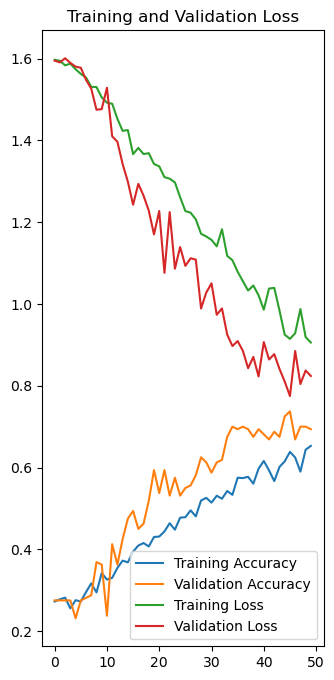

In [23]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
Actual label:  pawn_resized
1/1 [==============================] - 1s 511ms/step
Predicted label:  knight-resize


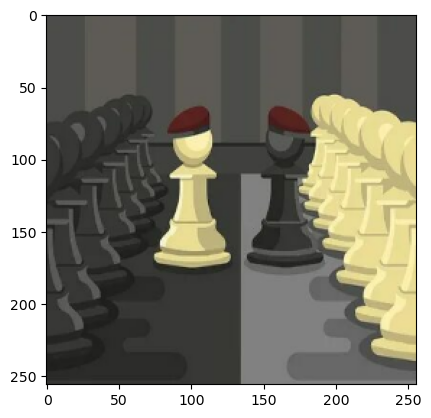

In [24]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print('First image to predict')
    plt.imshow(first_image)
    print('Actual label: ',class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print('Predicted label: ',class_names[np.argmax(batch_prediction[0])])
    

In [25]:
def predict(model_img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence
    

1/1 [==============================] - 0s 32ms/step


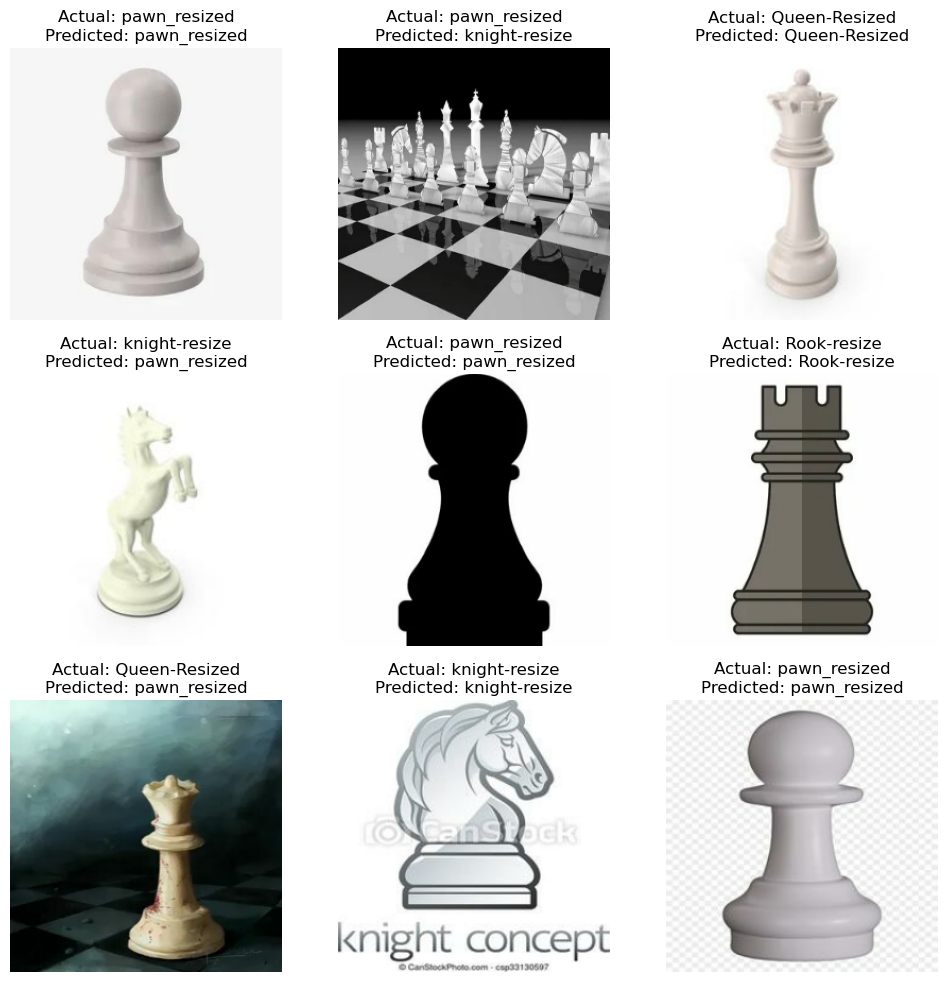

In [26]:
plt.figure(figsize=(12, 12))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predictions = model.predict(images[i][tf.newaxis, ...])  # Tek bir örnek için tahmin yapın
        predicted_class = class_names[tf.argmax(predictions, axis=1).numpy()[0]]
        actual_class = class_names[labels[i]]

        plt.title(f'Actual: {actual_class}\nPredicted: {predicted_class}')
        plt.axis('off')


In [27]:
model.save(f'../chess/fazlaDataEkledigim')

INFO:tensorflow:Assets written to: ../chess/fazlaDataEkledigim\assets


INFO:tensorflow:Assets written to: ../chess/fazlaDataEkledigim\assets
